In [59]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt 
import oct2py
import math
from mpl_toolkits.mplot3d import Axes3D


oc = oct2py.Oct2Py()

In [111]:
# Defn
sz = sigmaz()
sx = sigmax()
sy = sigmay()


# Parameters
g = 1
h = 1

# Hamiltonian

H = -(tensor(sz, sz, qeye(2), qeye(2)) + tensor(qeye(2), sz, sz, qeye(2)) + tensor(qeye(2), qeye(2), sz, sz)) 
Hn1 = g*(tensor(sx, qeye(2), qeye(2), qeye(2))+tensor(qeye(2), sx, qeye(2), qeye(2))+tensor(qeye(2), qeye(2), sx, qeye(2))+tensor(qeye(2), qeye(2), qeye(2), sx))
Hn2 = h*(tensor(sz, qeye(2), qeye(2), qeye(2))+tensor(qeye(2), sz, qeye(2), qeye(2))+tensor(qeye(2), qeye(2), sz, qeye(2))+tensor(qeye(2), qeye(2), qeye(2), sz))

# Op
A = tensor(sz, qeye(2), qeye(2), qeye(2))
B = tensor(qeye(2), qeye(2), qeye(2), sx)



In [112]:
otoc_list = []
time_list = []

for t in np.linspace(0.01, 7, 100):
    res = mesolve(H+Hn1+Hn2, B, np.linspace(0, t, 500))
    U = res.states[len(res.states)-1]
    otoc = (U * A * U.dag() * A).tr()/16
    
    otoc_list.append(otoc)
    time_list.append(t)
    
    

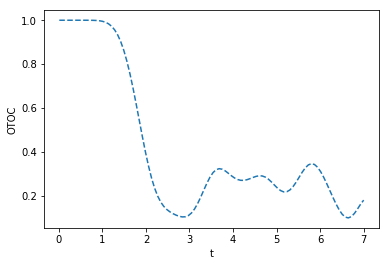

In [113]:
# Plotting

plt.plot(time_list, otoc_list, linestyle='dashed', markersize='1')
plt.xlabel('t')
plt.ylabel('OTOC')
plt.savefig("Du_g1_h1_zx", format="png", dpi=1000)